In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open("/content/drive/My Drive/Colab Notebooks/Project_TrafficSign/train.p", mode = 'rb') as training_data :
  train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/Project_TrafficSign/valid.p", mode = 'rb') as valiadtion_data :
  valid = pickle.load(valiadtion_data)
with open("/content/drive/My Drive/Colab Notebooks/Project_TrafficSign/test.p", mode = 'rb') as test_data :
  test = pickle.load(test_data)

In [0]:
X_train , y_train = train['features'] , train['labels']
X_val , y_val = valid['features'] , valid['labels']
X_test, y_test = test['features'] , test['labels']

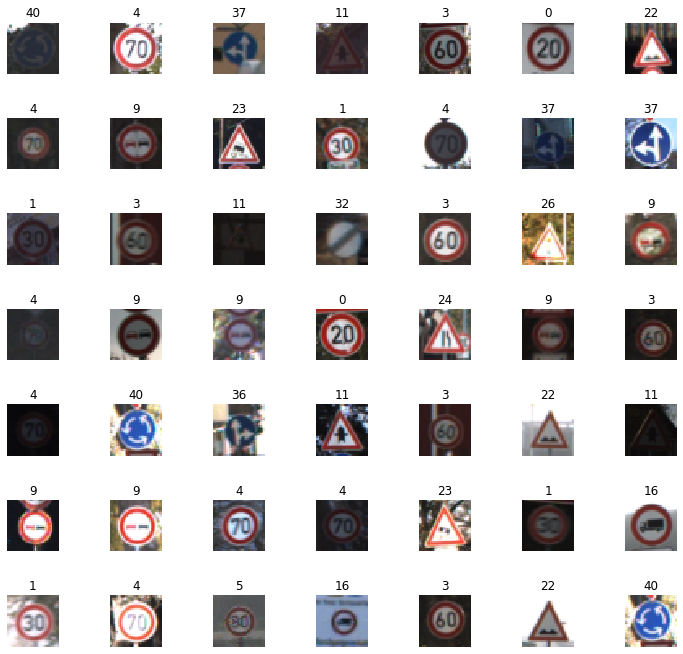

In [0]:
plt.figure(figsize=(12,12))
for i in range(49):
  n = np.random.randint(0,12630)
  plt.subplot(7,7,i+1)
  plt.imshow(X_train[n])
  plt.title(y_train[n])
  plt.axis('off')

plt.subplots_adjust(wspace = 1)

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
X_train_gray = np.sum(X_train/3 , axis = 3, keepdims= True)

In [0]:
X_valid_gray = np.sum(X_val/3 , axis = 3, keepdims= True)
X_test_gray = np.sum(X_test/3 , axis = 3, keepdims= True)

X_train_gray_norm = (X_train_gray - 128)/128
X_val_gray_norm =   (X_valid_gray - 128)/128
X_test_gray_norm =  (X_test_gray  - 128)/128

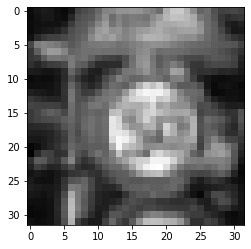

In [0]:
plt.imshow(X_train_gray_norm[100].squeeze(), cmap = 'gray')

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Conv2D(filters= 6, kernel_size= (5,5), activation='relu', input_shape = (32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters= 16, kernel_size= (5,5), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units = 120 , activation = 'relu'))
model.add(Dense(units = 84 , activation= 'relu'))
model.add(Dense(units = 43 , activation= 'softmax'))

In [0]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics= ['accuracy'])

In [0]:
data_augmentation = False

if data_augmentation:
  from keras.preprocessing.image import ImageDataGenerator

  datagen = ImageDataGenerator(	rotation_range=10,
                                zoom_range=0.2,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1)

  # Train the model
  history = model.fit_generator(datagen.flow(X_train_gray_norm, y_train,batch_size = 50), 
                                   nb_epoch = 10, steps_per_epoch = 2000, shuffle = 1,
                                  validation_data = (X_val_gray_norm,y_val), verbose=1)
else:
  history = model.fit(X_train_gray_norm,
            y_train,
            verbose =1,
            batch_size= 500,
            epochs= 50,
            validation_data= (X_val_gray_norm,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/50





34799/34799 [==============================] - 16s 473us/step - loss: 3.2171 - acc: 0.1567 - val_loss: 2.7396 - val_acc: 0.2932
Epoch 2/50
34799/34799 [==============================] - 1s 16us/step - loss: 1.6769 - acc: 0.5370 - val_loss: 1.2971 - val_acc: 0.6290
Epoch 3/50
34799/34799 [==============================] - 1s 17us/step - loss: 0.8802 - acc: 0.7550 - val_loss: 0.9059 - val_acc: 0.7399
Epoch 4/50
34799/34799 [==============================] - 1s 16us/step - loss: 0.6146 - acc: 0.8320 - val_loss: 0.7623 - val_acc: 0.7717
Epoch 5/50
34799/34799 [==============================] - 1s 16us/step - loss: 0.4918 - acc: 0.8673 - val_loss: 0.6718 - val_acc: 0.7993
Epoch 6/50
34799/34799 [==============================] - 1s 17us/step - loss: 0.4152 - acc: 0.8906 - val_loss: 0.6283 - val_acc: 0.8159
Epoch 7/50
34799/34799 [=

In [0]:
 score = model.evaluate(X_test_gray_norm,y_test)
 print('Test accuracy : {}'.format(score[1]))

12630/12630 [==============================] - 1s 59us/step
Test accuracy : 0.890261282650894


In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
validation_acc = history.history['val_acc']
training_acc   = history.history['acc']

epochs = range(len(training_acc))

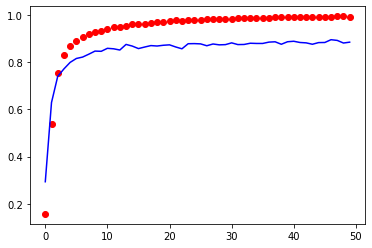

In [0]:
plt.plot(epochs,training_acc,'ro', label = 'Training Accuracy')
plt.plot(epochs,validation_acc, 'b',label = 'Validation Accuracy')

In [0]:
predicted_class = model.predict_classes(X_test_gray_norm)

y_true = y_test

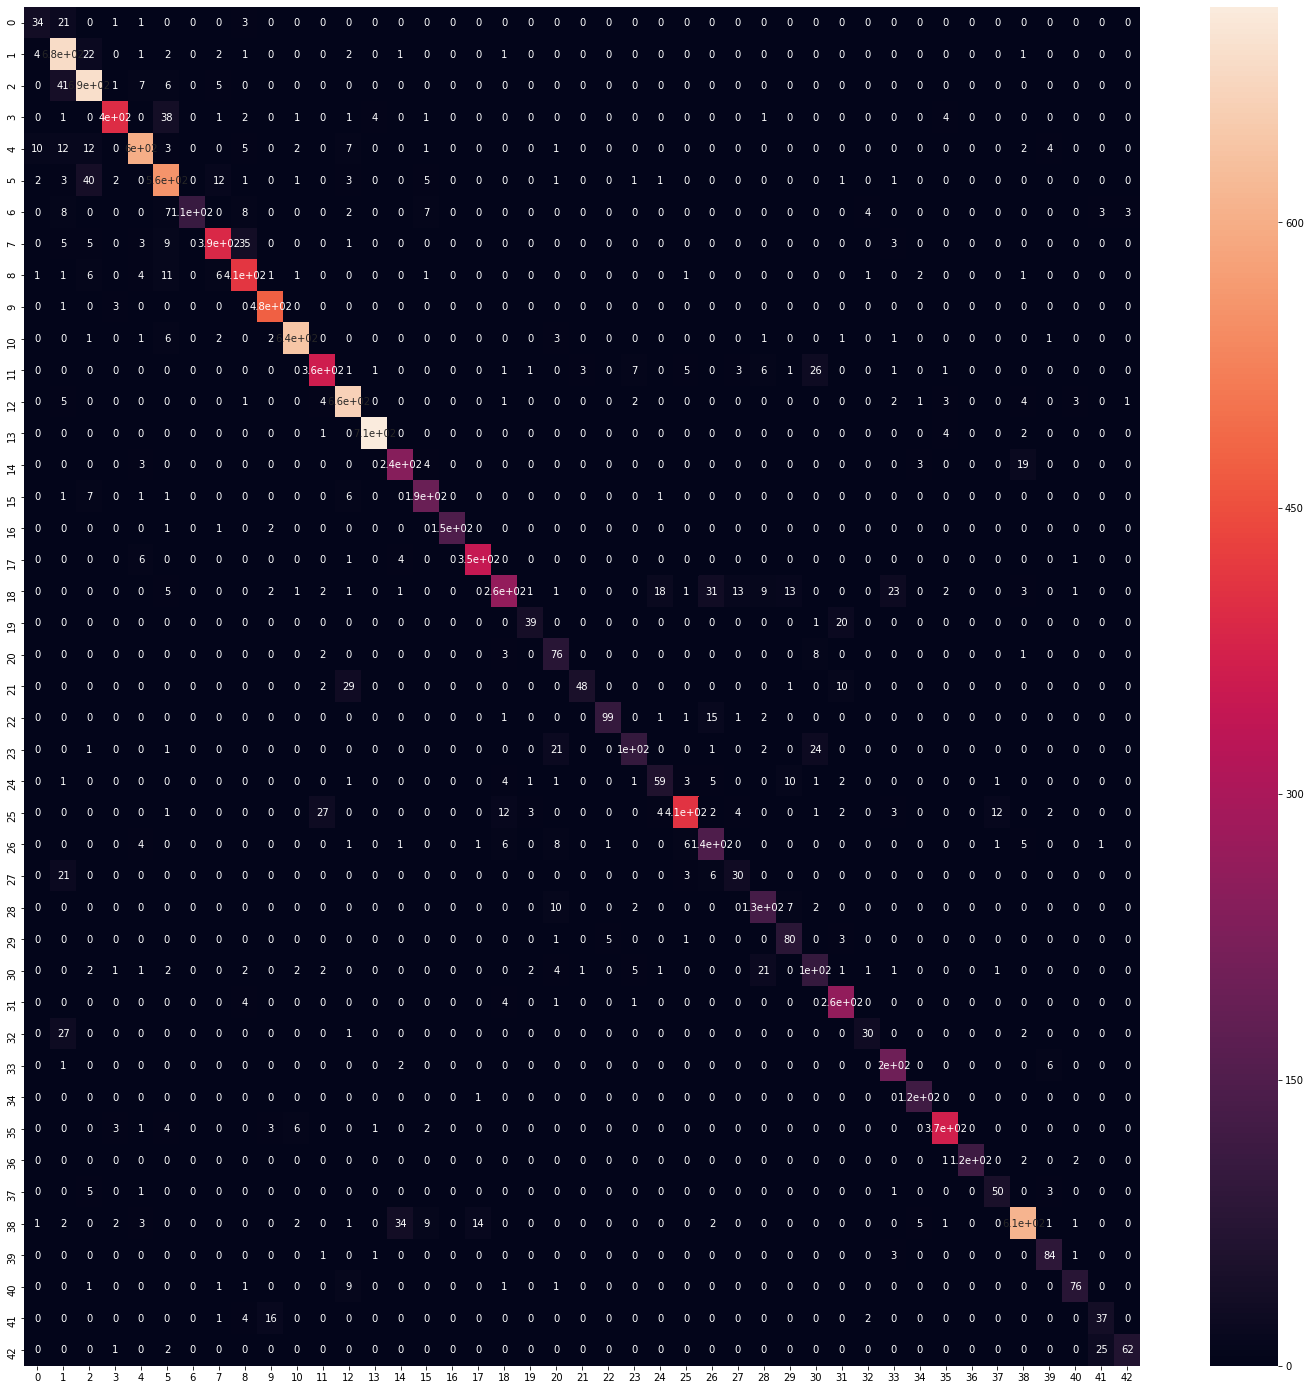

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_class)

plt.figure(figsize=(25,25))
sns.heatmap(cm, annot= True)

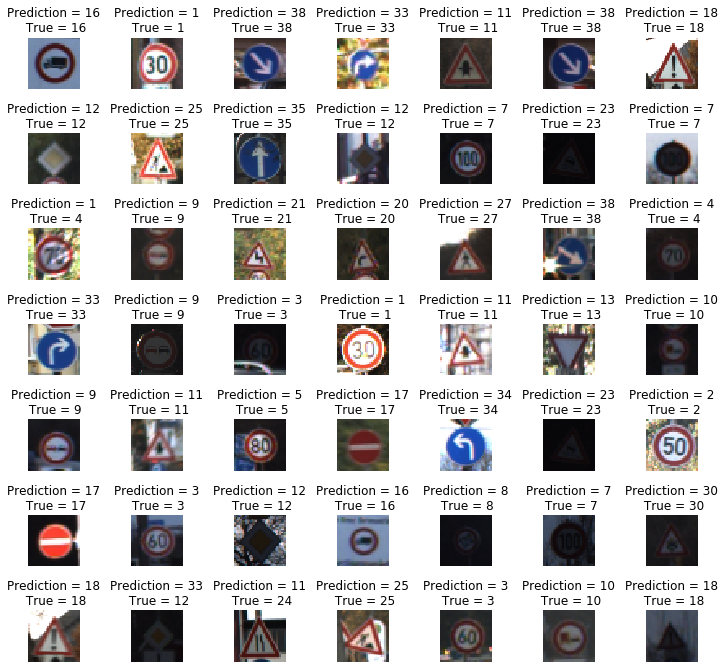

In [0]:
L =7
W =7

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in range(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_class[i], y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)